# Game of life

[Conway's Game of Life](https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life) is a cellular automation game. It represents a world as a grid with cells in it. These cells can die or create new cells based on their number of neighbors. Originally, we consider that cells will die if they are surrounded by too many other cells (more than 3) or by too few cells (less than 2). Moreover, if an empty square is surrounded by exactly 3 cells, a new cell will be created.

This allows for interesting patterns, such as oscillators (patterns that repeat themselves), generators (patterns that will create an endless stream of shapes, ...).

This notebook is a simple implementation of the Game of Life using numpy and scipy.

In [1]:
# imports

import numpy as np
from scipy.signal import convolve2d
import matplotlib.pyplot as plt
%matplotlib inline

from IPython.display import HTML, display, Image
import time
from tqdm import tqdm
import imageio
import os

To compute the number of neighboring cells that contain living cells, we are going to use convolution. Here we create a simple filter of size (3, 3) that will serve as our convolution filter.

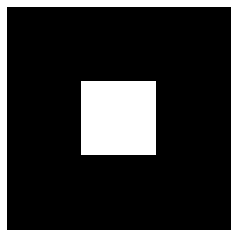

In [2]:
# parameters

neighbors_filter = np.ones(shape=(3, 3))
neighbors_filter[1, 1] = 0

plt.matshow(neighbors_filter, cmap="Greys")
plt.axis("off")

plt.show()

In [3]:
# computing a single step


class GameOfLife:
    def __init__(
        self,
        initial_grid:np.array,
        min_death_threshold:int=2,
        max_death_threshold:int=3,
        birth_condition:int=3,
        prefix:str="GoL"
    ):
        self.initial_grid = initial_grid.copy()
        self.grid = self.initial_grid.copy()
        self.grid_size = initial_grid.shape
        
        neighbors_filter = np.ones(shape=(3, 3))
        neighbors_filter[1, 1] = 0
        
        self.neighbors_filter = neighbors_filter
        
        self.min_death_threshold = min_death_threshold
        self.max_death_threshold = max_death_threshold
        self.birth_condition = max_death_threshold
        
        self.step = 0
        
        self.history = [self.initial_grid]
        
        self.prefix = prefix
        
        
    def compute_step(self):

        neighbors_counter = convolve2d(
            self.grid, 
            self.neighbors_filter,
            mode='same'
        )

        new_grid = self.grid.copy()

        # deaths
        new_grid[neighbors_counter < self.min_death_threshold] = 0
        new_grid[neighbors_counter > self.max_death_threshold] = 0

        # births
        new_grid[neighbors_counter == self.birth_condition] = 1

        self.grid = new_grid
        self.step += 1
        self.history.append(new_grid)
    
    def compute_episode(
        self,
        n_steps:int=10,
        start_fresh=False
    ):
        if start_fresh:
            self.step = 0
            self.grid = self.initial_grid.copy()
            self.histoyr = self.initial_grid
        
        for _ in tqdm(range(n_steps)):
            self.compute_step()
            
    def create_frame(self, frame_number:int=0, save:bool=False, folder:str=""):
        fig, ax = plt.subplots(1, 1, figsize=(10, 10))
        
        ax.matshow(self.history[frame_number], cmap="Greys")
        
        ax.axis("off")
        
        if save:
            try:
                os.mkdir(folder)
            except FileExistsError:
                pass
            plt.savefig(
                f"{folder}/{self.prefix}_{frame_number}.png"
            )
            plt.close()
        
        
        
    def create_gif(self, temp_folder="./tmp", frames:list=[], gif_name:str="", frame_duration:float=.5, remove_dir:bool=True):
        try:
            os.mkdir(temp_folder)
        except FileExistsError:
            pass
        if len(frames) == 0:
            frames = list(range(len(self.history)))
        
        image_names = []
        images = []
        for i_frame in frames:
            self.create_frame(
                frame_number=i_frame,
                save=True,
                folder=temp_folder
            )
            image_names.append(f"{temp_folder}/{self.prefix}_{i_frame}.png")
            images.append(
                imageio.imread(f"{temp_folder}/{self.prefix}_{i_frame}.png")
            )
        if not gif_name:
            gif_name = f"{self.prefix}_{min(frames)}_{max(frames)}.gif"
        imageio.mimsave(gif_name, images, "GIF", duration=frame_duration)
        
        if remove_dir:
            for i in image_names:
                os.remove(i)
            os.rmdir(temp_folder, )
        

## Oscillators

There are some very well known oscillators:

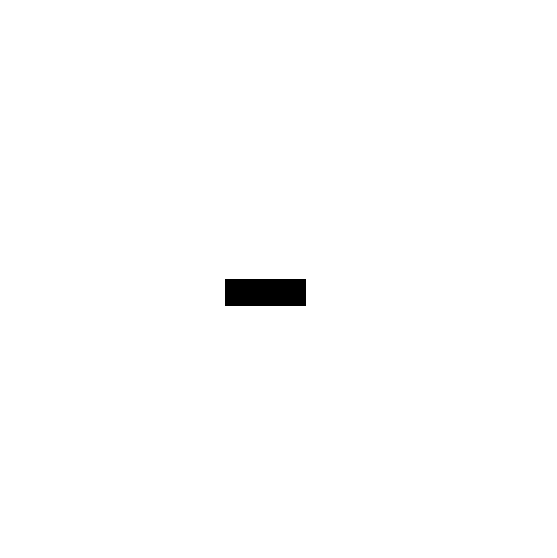

In [4]:
initial_grid = np.zeros(shape=(20, 20))
initial_grid[10, 8:11] = 1

gol = GameOfLife(initial_grid=initial_grid, prefix="bar_3_oscillator")

gol.create_frame()

100%|████████████████████████████████████████| 30/30 [00:00<00:00, 19281.20it/s]


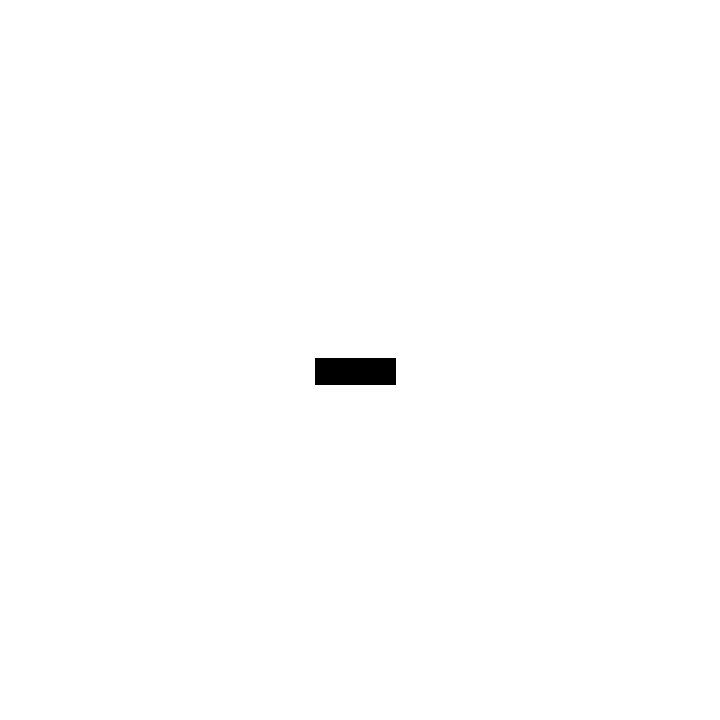

In [5]:
gol.compute_episode(n_steps=30, start_fresh=True)
gol.create_gif()

display(Image("bar_3_oscillator_0_30.gif"))

100%|█████████████████████████████████████████| 10/10 [00:00<00:00, 7757.17it/s]


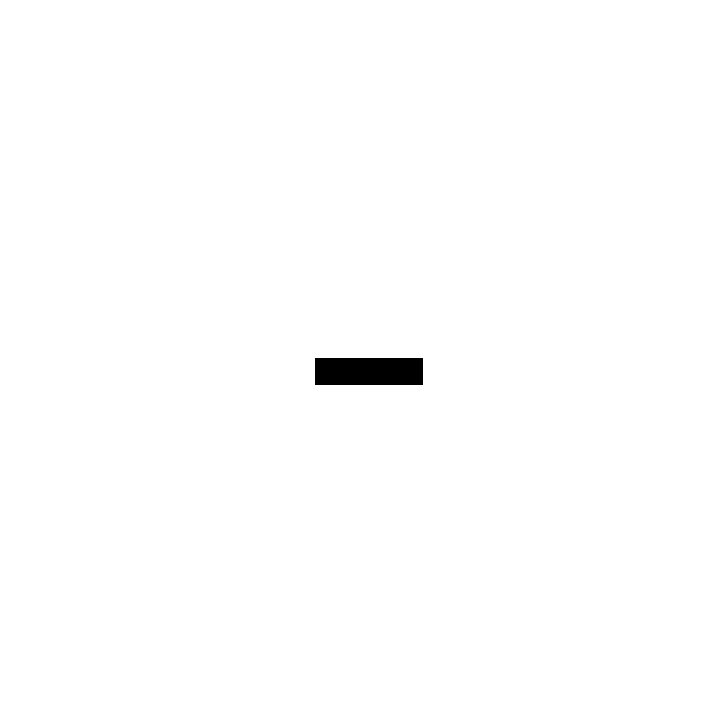

In [10]:
initial_grid = np.zeros(shape=(20, 20))
initial_grid[10, 8:12] = 1

gol = GameOfLife(initial_grid=initial_grid, prefix="bar_4_oscillator")


gol.compute_episode(n_steps=10, start_fresh=True)
gol.create_gif()

display(Image("bar_4_oscillator_0_10.gif"))

100%|████████████████████████████████████████| 30/30 [00:00<00:00, 12703.60it/s]


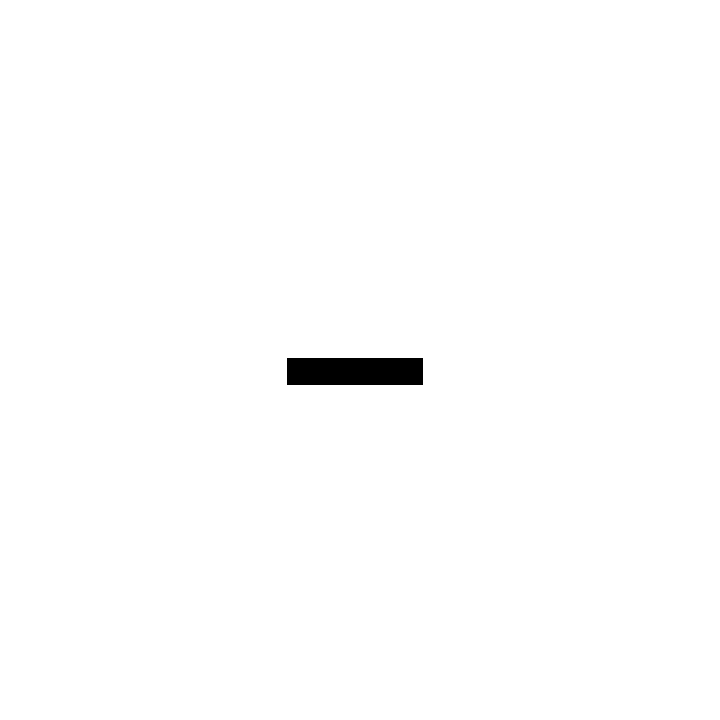

In [11]:
initial_grid = np.zeros(shape=(20, 20))
initial_grid[10, 7:12] = 1

gol = GameOfLife(initial_grid=initial_grid, prefix="bar_5_oscillator")


gol.compute_episode(n_steps=30, start_fresh=True)
gol.create_gif()

display(Image("bar_5_oscillator_0_30.gif"))